In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


In [6]:
df = pd.read_csv("../../data/csv_files/df_ph1.csv")

In [8]:
print(df.shape)
df.head()

(7748, 10)


,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,2023-07-28 05:00:00.000,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151
1,2023-07-28 06:00:00.000,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072
2,2023-07-28 07:00:00.000,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076
3,2023-07-28 08:00:00.000,3.981121,4.236699,4.166883,NaN,4.130379,5.267786,7.712222,6.417735,3.767253
4,2023-07-28 09:00:00.000,3.981221,4.239193,4.168008,NaN,4.130503,5.265711,7.712381,6.417951,3.767425


In [10]:
colors = ["Red", "Blue", "Green", "Yellow", "Purple", "Orange", "Pink", "Brown", "Gray"]

In [12]:
temp = df.fillna(0)

In [14]:
temp.head()

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,2023-07-28 05:00:00.000,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151
1,2023-07-28 06:00:00.000,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072
2,2023-07-28 07:00:00.000,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076
3,2023-07-28 08:00:00.000,3.981121,4.236699,4.166883,0.000000,4.130379,5.267786,7.712222,6.417735,3.767253
4,2023-07-28 09:00:00.000,3.981221,4.239193,4.168008,0.000000,4.130503,5.265711,7.712381,6.417951,3.767425


In [16]:
temp.shape

(7748, 10)

In [18]:
cols = list(df.columns)
cols

['dt',
 'FEX_004',
 'FSB_095DR',
 'FSB_078',
 'FSB_126',
 'FSB_130D',
 'FPZ_06A',
 'FSB_079',
 'FPZ_04A',
 'FSB_097D']

In [20]:
cols.remove("dt")
cols

['FEX_004',
 'FSB_095DR',
 'FSB_078',
 'FSB_126',
 'FSB_130D',
 'FPZ_06A',
 'FSB_079',
 'FPZ_04A',
 'FSB_097D']

<Axes: xlabel='dt'>

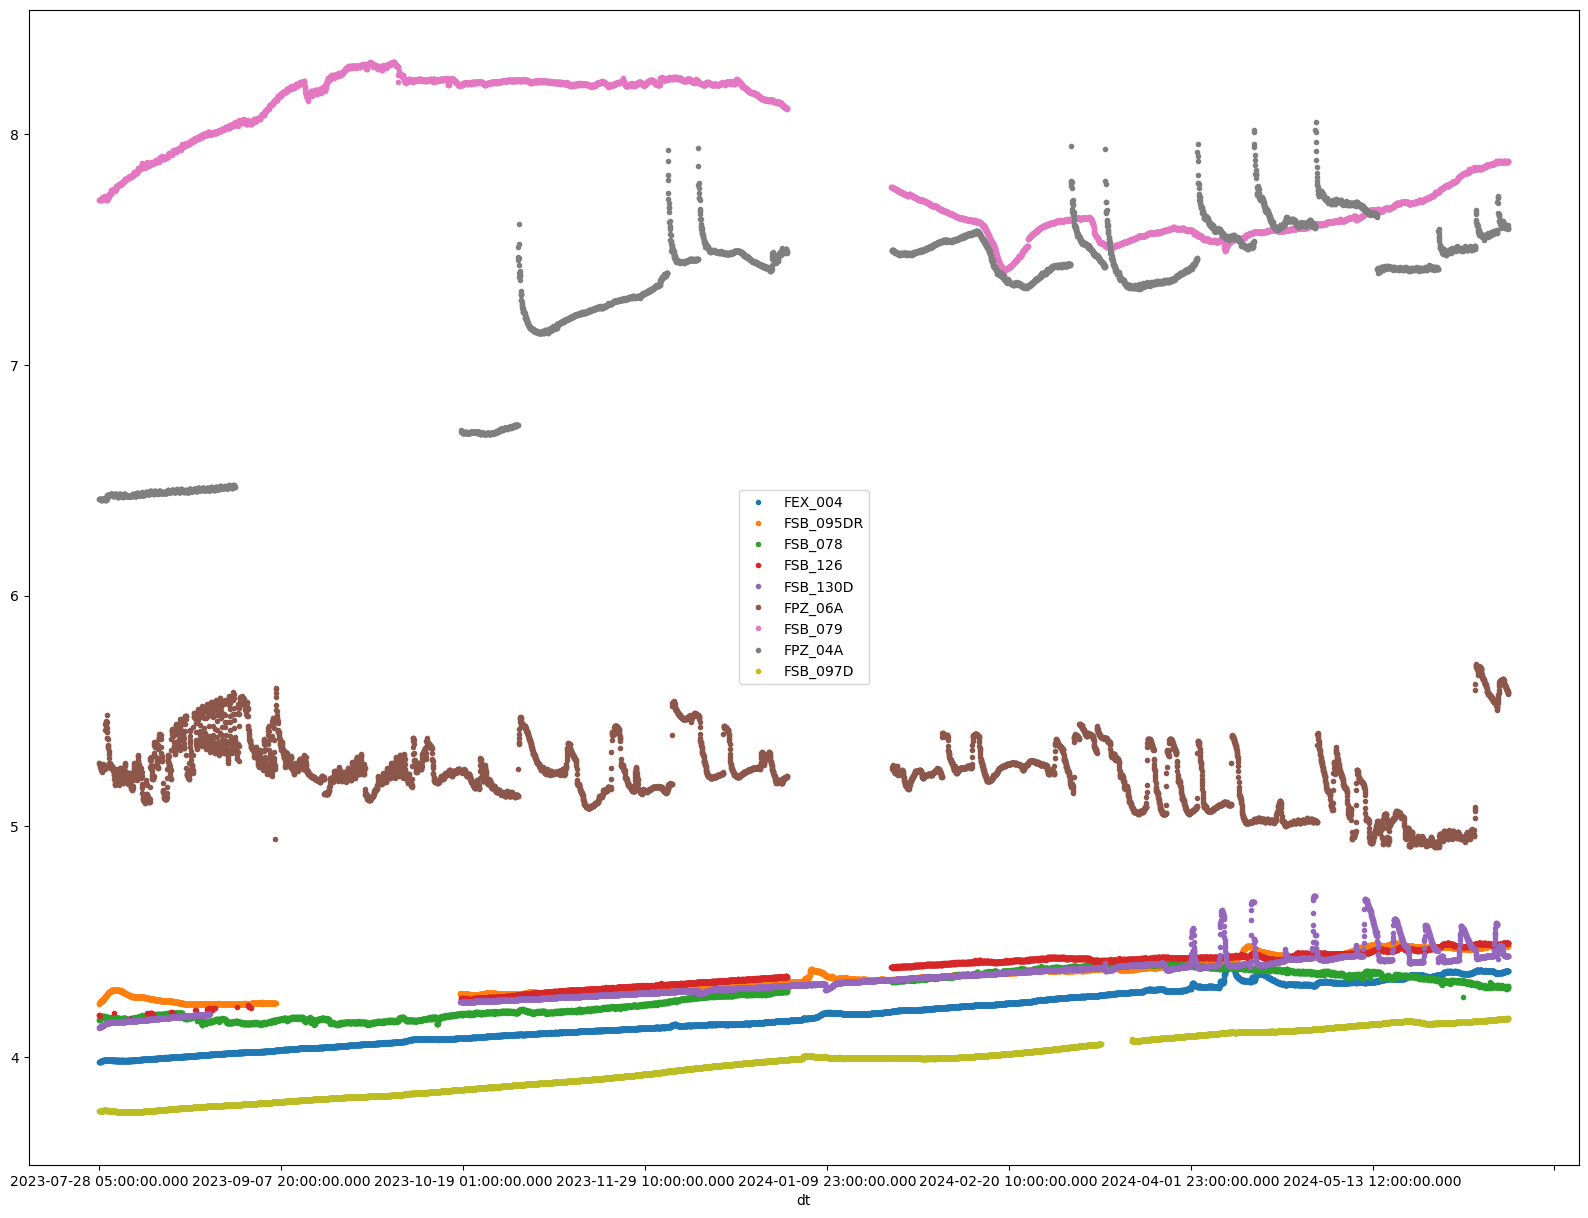

In [22]:
df.plot(x = 'dt', style=".", figsize=(20,15))

In [23]:
stations_name = np.array(cols)
index =3

<Axes: xlabel='dt'>

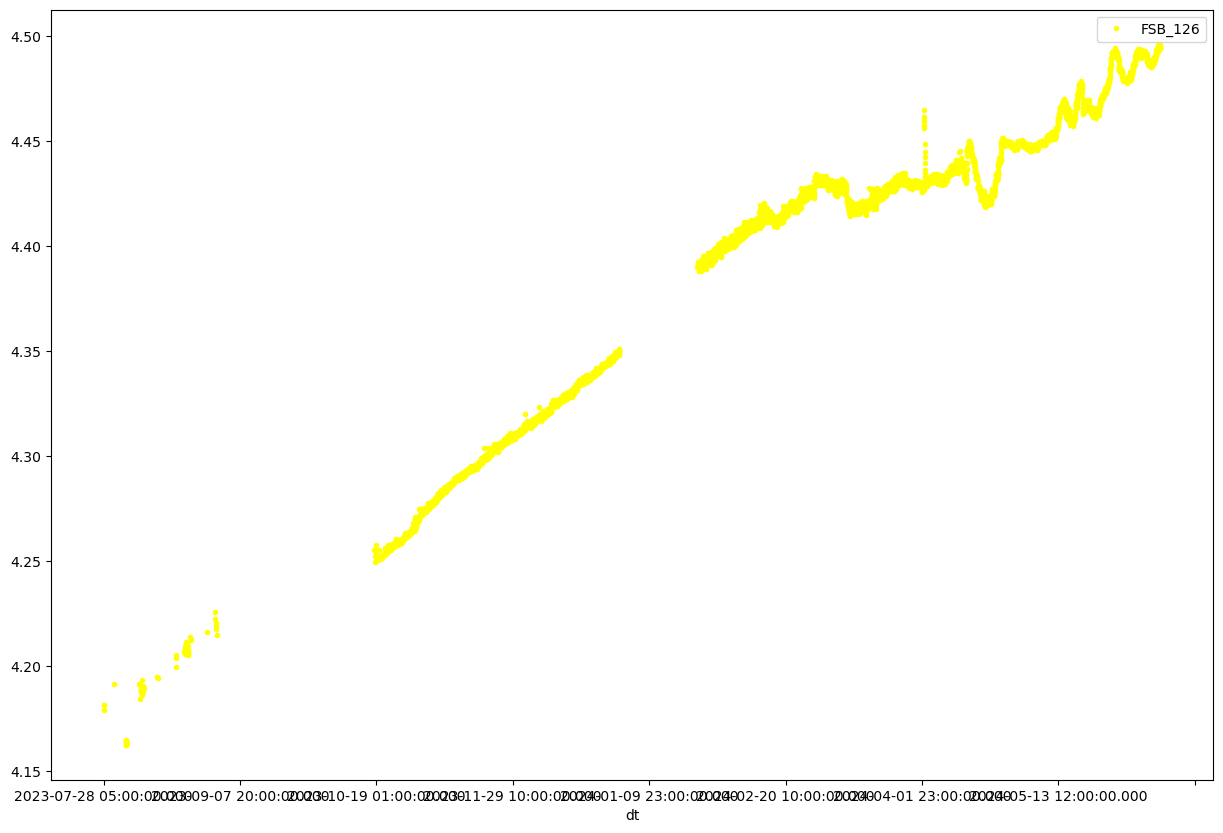

In [26]:
df.plot(x='dt', y=stations_name[index], style=".", figsize=(15, 10), color = colors[index])

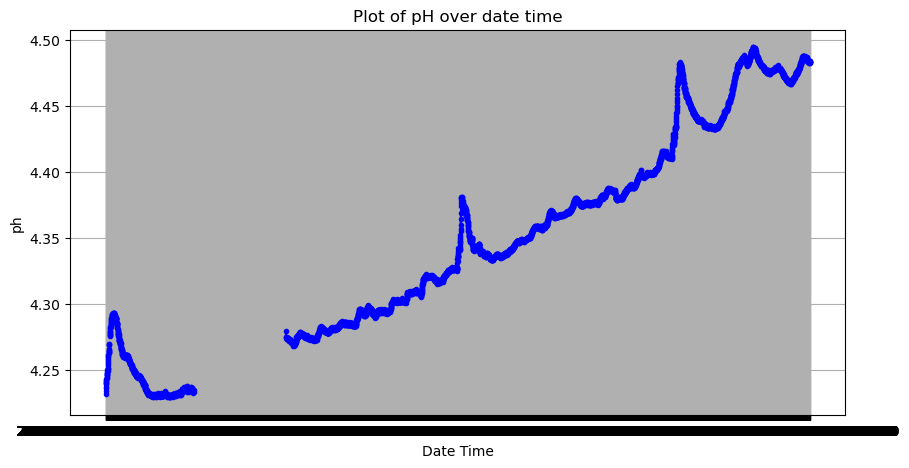

In [307]:

plt.figure(figsize=(10, 5))
# for index,station in enumerate(stations_name):
index = 1
plt.plot(df["dt"], df[stations_name[index]], marker='.', color=colors[index])


plt.xlabel('Date Time')
plt.ylabel('ph')
plt.title('Plot of pH over date time')
plt.grid(True)
plt.show()

In [308]:
df.isna().sum()

dt              0
FEX_004        46
FSB_095DR    1090
FSB_078       611
FSB_126      2631
FSB_130D     1416
FPZ_06A       615
FSB_079       611
FPZ_04A      1846
FSB_097D      211
dtype: int64

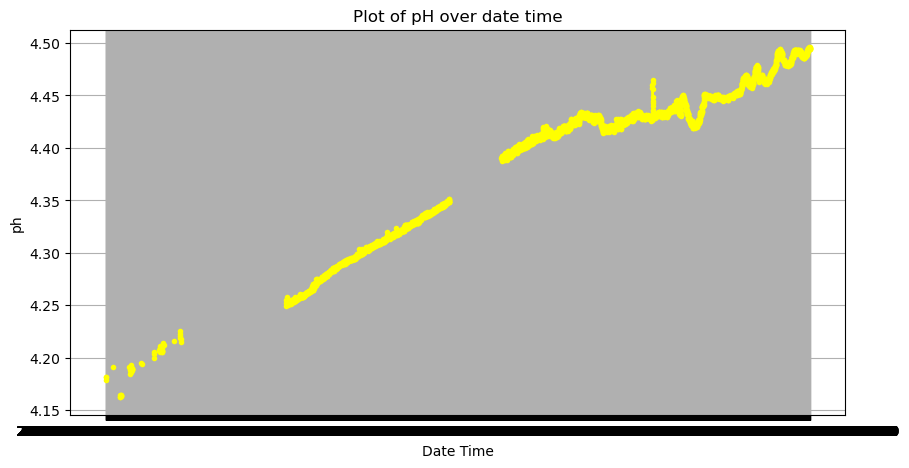

In [309]:
plt.figure(figsize=(10, 5))
# for index,station in enumerate(stations_name):
index = 3
plt.plot(df["dt"], df[stations_name[index]], marker='.', color=colors[index])


plt.xlabel('Date Time')
plt.ylabel('ph')
plt.title('Plot of pH over date time')
plt.grid(True)
plt.show()

In [310]:
temp = pd.DataFrame()

In [130]:
temp["dt"] = df["dt"]
temp["FSB_126"] = df["FSB_126"]

In [131]:
temp

,dt,FSB_126
0,2023-07-28 05:00:00.000,4.181472
1,2023-07-28 06:00:00.000,4.181599
2,2023-07-28 07:00:00.000,4.179049
3,2023-07-28 08:00:00.000,NaN
4,2023-07-28 09:00:00.000,NaN
...,...,...
7743,2024-06-12 20:00:00.000,4.495069
7744,2024-06-12 21:00:00.000,4.494333
7745,2024-06-12 22:00:00.000,4.495460
7746,2024-06-12 23:00:00.000,4.494287


In [138]:
start_array = []
end_array = []
start_na = True

for index, row in temp.iterrows():
    if pd.isna(row['FSB_126']) and start_na:
        start_na = False
        start_array.append(row['dt'])
    elif not pd.isna(row['FSB_126']) and not start_na:
        start_na = True
        end_array.append(row['dt'])


In [140]:
print(len(start_array), len(end_array))

85 85


In [142]:
start_end = {}
for start, end in zip(start_array, end_array):
    start_end[start] = end

print(start_end)

{'2023-07-28 08:00:00.000': '2023-07-31 13:00:00.000', '2023-07-31 14:00:00.000': '2023-08-03 22:00:00.000', '2023-08-04 00:00:00.000': '2023-08-04 01:00:00.000', '2023-08-04 07:00:00.000': '2023-08-08 04:00:00.000', '2023-08-08 05:00:00.000': '2023-08-08 07:00:00.000', '2023-08-08 08:00:00.000': '2023-08-08 14:00:00.000', '2023-08-09 09:00:00.000': '2023-08-09 10:00:00.000', '2023-08-09 11:00:00.000': '2023-08-13 16:00:00.000', '2023-08-13 17:00:00.000': '2023-08-13 19:00:00.000', '2023-08-13 20:00:00.000': '2023-08-19 05:00:00.000', '2023-08-19 07:00:00.000': '2023-08-19 08:00:00.000', '2023-08-19 09:00:00.000': '2023-08-21 19:00:00.000', '2023-08-21 21:00:00.000': '2023-08-22 01:00:00.000', '2023-08-22 05:00:00.000': '2023-08-22 06:00:00.000', '2023-08-23 04:00:00.000': '2023-08-23 14:00:00.000', '2023-08-23 15:00:00.000': '2023-08-23 19:00:00.000', '2023-08-23 20:00:00.000': '2023-08-28 16:00:00.000', '2023-08-28 17:00:00.000': '2023-08-31 07:00:00.000', '2023-08-31 11:00:00.000': 

In [144]:
date_ranges = {start: (mdates.datestr2num(start), mdates.datestr2num(end)) for start, end in start_end.items()}

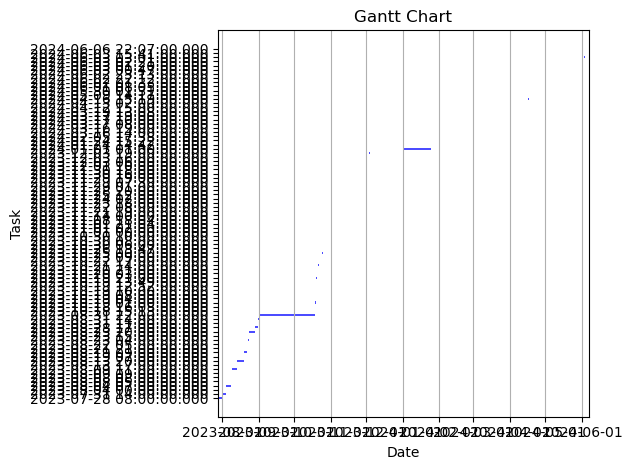

In [146]:
fig, ax = plt.subplots()

for i, (start, end) in enumerate(date_ranges.values()):
    ax.barh(i, end - start, left=start, height=0.5, align='center', color='blue', alpha=0.7)

# Formatting
ax.set_yticks(range(len(start_end)))
ax.set_yticklabels(start_end.keys())
ax.xaxis_date()

# Set date format on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Task')
plt.title('Gantt Chart')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [148]:
def check_between(start_end_map, datetime):
    for start, end in start_end_map.items():
        if start <= datetime <= end:
            return 1
    return 0

In [150]:
temp['test'] = temp['dt'].apply(lambda x: check_between(start_end, x))
temp

,dt,FSB_126,test
0,2023-07-28 05:00:00.000,4.181472,0
1,2023-07-28 06:00:00.000,4.181599,0
2,2023-07-28 07:00:00.000,4.179049,0
3,2023-07-28 08:00:00.000,NaN,1
4,2023-07-28 09:00:00.000,NaN,1
...,...,...,...
7743,2024-06-12 20:00:00.000,4.495069,0
7744,2024-06-12 21:00:00.000,4.494333,0
7745,2024-06-12 22:00:00.000,4.495460,0
7746,2024-06-12 23:00:00.000,4.494287,0


In [152]:
temp.isna().sum()

dt            0
FSB_126    2631
test          0
dtype: int64

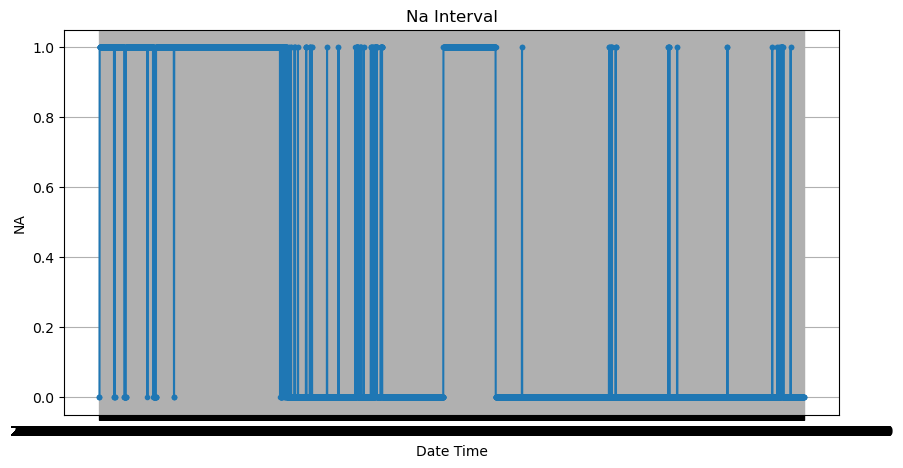

In [154]:
plt.figure(figsize=(10, 5))
plt.plot(temp['dt'],temp['test'], marker='.')
plt.title('Na Interval')
plt.xlabel('Date Time')
plt.ylabel('NA')
plt.grid(True)
plt.show()

In [2]:
# df.set_index('dt', inplace=True)
df.plot(style = ".", figsize = (15,10))

NameError: name 'df' is not defined

In [317]:
start_end

{'2023-07-28 08:00:00.000': '2023-07-31 13:00:00.000',
 '2023-07-31 14:00:00.000': '2023-08-03 22:00:00.000',
 '2023-08-04 00:00:00.000': '2023-08-04 01:00:00.000',
 '2023-08-04 07:00:00.000': '2023-08-08 04:00:00.000',
 '2023-08-08 05:00:00.000': '2023-08-08 07:00:00.000',
 '2023-08-08 08:00:00.000': '2023-08-08 14:00:00.000',
 '2023-08-09 09:00:00.000': '2023-08-09 10:00:00.000',
 '2023-08-09 11:00:00.000': '2023-08-13 16:00:00.000',
 '2023-08-13 17:00:00.000': '2023-08-13 19:00:00.000',
 '2023-08-13 20:00:00.000': '2023-08-19 05:00:00.000',
 '2023-08-19 07:00:00.000': '2023-08-19 08:00:00.000',
 '2023-08-19 09:00:00.000': '2023-08-21 19:00:00.000',
 '2023-08-21 21:00:00.000': '2023-08-22 01:00:00.000',
 '2023-08-22 05:00:00.000': '2023-08-22 06:00:00.000',
 '2023-08-23 04:00:00.000': '2023-08-23 14:00:00.000',
 '2023-08-23 15:00:00.000': '2023-08-23 19:00:00.000',
 '2023-08-23 20:00:00.000': '2023-08-28 16:00:00.000',
 '2023-08-28 17:00:00.000': '2023-08-31 07:00:00.000',
 '2023-08-

In [322]:
length = {}
for start, end in start_end.items():
    length[(start, end)] = pd.to_datetime(end) - pd.to_datetime(start)

length

{('2023-07-28 08:00:00.000',
  '2023-07-31 13:00:00.000'): Timedelta('3 days 05:00:00'),
 ('2023-07-31 14:00:00.000',
  '2023-08-03 22:00:00.000'): Timedelta('3 days 08:00:00'),
 ('2023-08-04 00:00:00.000',
  '2023-08-04 01:00:00.000'): Timedelta('0 days 01:00:00'),
 ('2023-08-04 07:00:00.000',
  '2023-08-08 04:00:00.000'): Timedelta('3 days 21:00:00'),
 ('2023-08-08 05:00:00.000',
  '2023-08-08 07:00:00.000'): Timedelta('0 days 02:00:00'),
 ('2023-08-08 08:00:00.000',
  '2023-08-08 14:00:00.000'): Timedelta('0 days 06:00:00'),
 ('2023-08-09 09:00:00.000',
  '2023-08-09 10:00:00.000'): Timedelta('0 days 01:00:00'),
 ('2023-08-09 11:00:00.000',
  '2023-08-13 16:00:00.000'): Timedelta('4 days 05:00:00'),
 ('2023-08-13 17:00:00.000',
  '2023-08-13 19:00:00.000'): Timedelta('0 days 02:00:00'),
 ('2023-08-13 20:00:00.000',
  '2023-08-19 05:00:00.000'): Timedelta('5 days 09:00:00'),
 ('2023-08-19 07:00:00.000',
  '2023-08-19 08:00:00.000'): Timedelta('0 days 01:00:00'),
 ('2023-08-19 09:00:0

In [324]:
# from above we find out that we need to consider the data after
# 2024 - 1 - 24 
df

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,2023-07-28 05:00:00.000,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151
1,2023-07-28 06:00:00.000,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072
2,2023-07-28 07:00:00.000,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076
3,2023-07-28 08:00:00.000,3.981121,4.236699,4.166883,NaN,4.130379,5.267786,7.712222,6.417735,3.767253
4,2023-07-28 09:00:00.000,3.981221,4.239193,4.168008,NaN,4.130503,5.265711,7.712381,6.417951,3.767425
...,...,...,...,...,...,...,...,...,...,...
7743,2024-06-12 20:00:00.000,4.373425,4.483142,4.300413,4.495069,4.439222,5.585535,7.878193,7.592293,4.167729
7744,2024-06-12 21:00:00.000,4.374073,4.482854,4.301687,4.494333,4.439609,5.582193,7.877029,7.593216,4.167895
7745,2024-06-12 22:00:00.000,4.375431,4.483341,4.304706,4.495460,4.439438,5.579660,7.880521,7.605413,4.167374
7746,2024-06-12 23:00:00.000,4.373557,4.482985,4.309968,4.494287,4.439528,5.576629,7.880730,7.593132,4.168333


In [326]:
df = df[df['dt'] >= "2024-01-24 14:06:00.000"]

In [328]:
df

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
4353,2024-01-24 14:06:00.000,NaN,NaN,NaN,4.390264,NaN,NaN,NaN,NaN,NaN
4354,2024-01-24 14:42:00.000,NaN,NaN,NaN,NaN,NaN,NaN,7.768566,NaN,NaN
4355,2024-01-24 15:00:00.000,4.199255,4.335871,NaN,4.390036,4.335593,NaN,7.767843,NaN,3.997356
4356,2024-01-24 15:22:00.000,NaN,NaN,4.335450,NaN,NaN,NaN,NaN,NaN,NaN
4357,2024-01-24 16:00:00.000,4.199346,4.335111,4.331754,4.390786,4.334991,NaN,7.768126,7.497128,3.996470
...,...,...,...,...,...,...,...,...,...,...
7743,2024-06-12 20:00:00.000,4.373425,4.483142,4.300413,4.495069,4.439222,5.585535,7.878193,7.592293,4.167729
7744,2024-06-12 21:00:00.000,4.374073,4.482854,4.301687,4.494333,4.439609,5.582193,7.877029,7.593216,4.167895
7745,2024-06-12 22:00:00.000,4.375431,4.483341,4.304706,4.495460,4.439438,5.579660,7.880521,7.605413,4.167374
7746,2024-06-12 23:00:00.000,4.373557,4.482985,4.309968,4.494287,4.439528,5.576629,7.880730,7.593132,4.168333


In [330]:
temp = df.fillna(0)

<Axes: >

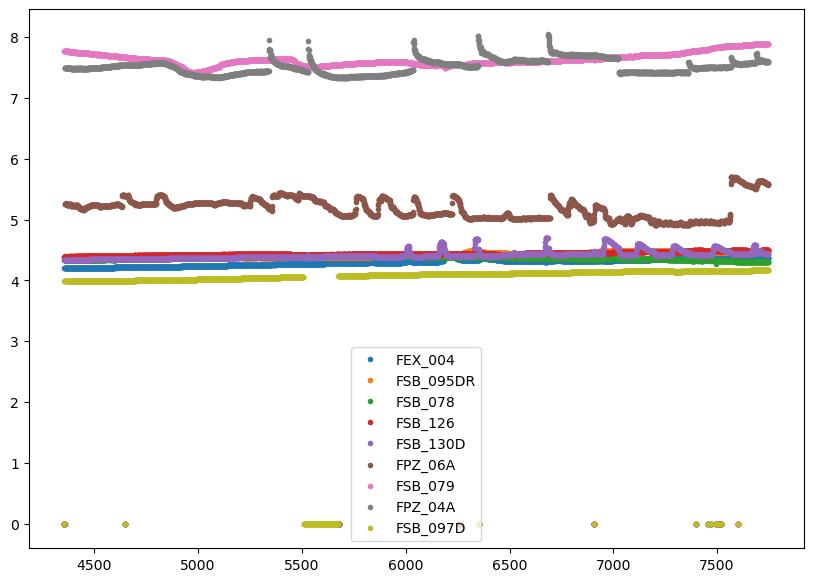

In [334]:
temp.plot(style = ".", figsize = (10,7))